# Encoding and similarity

In [1]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision import transforms
import torch.nn.functional as F
import random
from torchvision.transforms import v2

In [2]:
!git clone https://github.com/facebookresearch/dinov3.git
%cd dinov3
!pip install -r requirements.txt

Cloning into 'dinov3'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (264/264), done.
remote: Total 538 (delta 201), reused 99 (delta 99), pack-reused 175 (from 1)
Receiving objects: 100% (538/538), 9.88 MiB | 9.88 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/dinov3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.5 MB/s eta 0:00:00


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using: {device}')

Using: cuda


In [ ]:
REPO_DIR = "/content/dinov3"
meta_link = "secret"
dinov3_vitb16 = torch.hub.load(REPO_DIR, 'dinov3_vitb16', source='local', weights=meta_link)

dinov3_vitb16
dinov3_vitb16.eval()
dinov3_vitb16.to(device)

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (rope_embed): RopePositionEmbedding()
  (blocks): ModuleList(
    (0-11): 12 x SelfAttentionBlock(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv): LinearKMaskedBias(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
    )
  )
  (norm): LayerN

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (rope_embed): RopePositionEmbedding()
  (blocks): ModuleList(
    (0-11): 12 x SelfAttentionBlock(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv): LinearKMaskedBias(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
    )
  )
  (norm): LayerN

In [9]:
!unzip -q '/content/fish' -d '/content/fish'

In [ ]:
!ls '/content/fish/images/'

IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.jpg
IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg
IMG_2279_jpeg_jpg.rf.c93235205522529fc7e9626bf9175cba.jpg
IMG_2288_jpeg_jpg.rf.18da58173e72084ebd73149bc8914ec1.jpg
IMG_2297_jpeg_jpg.rf.a7b46f3c112b1c319d824598ee1aafd5.jpg
IMG_2305_jpeg_jpg.rf.9590ed0a48add800dc5ea8d3f85d3469.jpg
IMG_2317_jpeg_jpg.rf.f30ebbdde1be950767da30bd3fbc1493.jpg
IMG_2318_jpeg_jpg.rf.f073a5ac61db9f821cc03d23f4a22ea6.jpg
IMG_2323_jpeg_jpg.rf.035c5370cfa9efce40a515ce4ec72179.jpg
IMG_2325_jpeg_jpg.rf.a8ebf587a5ae7d2f8c58f977583e344c.jpg
IMG_2329_jpeg_jpg.rf.4a1c2bdd0841672f2b75310a8276bfdc.jpg
IMG_2333_jpeg_jpg.rf.0dfdf7c17f438c4a2eacebdfef82bdeb.jpg
IMG_2334_jpeg_jpg.rf.b545bdad952bf47fbadb8ee504e52c36.jpg
IMG_2337_jpeg_jpg.rf.8c0fdb28fa8bfd6adf906153bb4c90a2.jpg
IMG_2339_jpeg_jpg.rf.f31a698f6d75d00ce27b24801b6d88dd.jpg
IMG_2342_jpeg_jpg.rf.f36e481b4e01c2e76e0b27e494682873.jpg
IMG_2345_jpeg_jpg.rf.1c32346981ba9d501078eb82f2c63555.jpg
IMG_2348_jpeg_

Transform provided from DinoV3 github

https://github.com/facebookresearch/dinov3?tab=readme-ov-file

In [ ]:
def make_transform(resize_size: int = 512):
    to_tensor = transforms.v2.ToImage()
    resize = transforms.v2.Resize((resize_size, resize_size), antialias=True)
    to_float = transforms.v2.ToDtype(torch.float32, scale=True)
    normalize = transforms.v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return transforms.v2.Compose([to_tensor, resize, to_float, normalize])

Original dimensions of img: (1024, 576, 3)
Preprocessed image (x): torch.Size([1, 3, 1024, 1024])


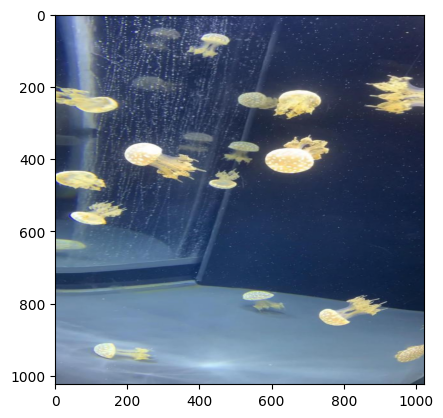

In [ ]:
mean = torch.tensor([0.485, 0.456, 0.406], device=device)
std = torch.tensor([0.229, 0.224, 0.225], device=device)
dim_x = 1024

preprocess = make_transform(dim_x)

random_n = random.randint(0, len(os.listdir('/content/fish/images/')))

img_path = '/content/fish/images/' + os.listdir('/content/fish/images/')[random_n]
img = Image.open(img_path).convert("RGB")
x = preprocess(img).unsqueeze(0).to(device)
print(f'Original dimensions of img: {np.array(img).shape}')
print(f'Preprocessed image (x): {x.shape}')

# normalize and look
x_vis = x.clone()
x_vis = x.squeeze()
x_vis = x_vis * std[:, None, None] + mean[:, None, None]
x_vis = torch.clamp(x_vis, 0, 1)
plt.imshow(x_vis.permute(1, 2, 0).cpu())

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

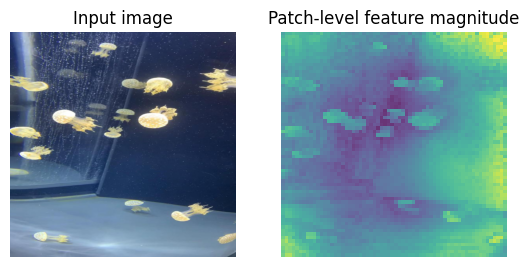

In [ ]:
dinov3_vitb16 = dinov3_vitb16.to(x.device)
dinov3_vitb16.eval()

x = preprocess(img).unsqueeze(0).to(device)
with torch.no_grad():
  features_dict = dinov3_vitb16.forward_features(x)
  patch_features = features_dict['x_norm_patchtokens']  # (1, num_patches, embed_dim)


# patch norms
patch_norms = patch_features.norm(dim=-1).squeeze()  # n_patches
grid_size = int(patch_norms.shape[0] ** 0.5)
patch_map = patch_norms.reshape(grid_size, grid_size).cpu().numpy()

f, a = plt.subplots(1,2)
a[0].imshow(x_vis.permute(1, 2, 0).cpu())
a[0].set_title("Input image")
a[0].axis('off')
a[1].imshow(patch_map, cmap='viridis', alpha=0.8)
a[1].set_title("Patch-level feature magnitude")
plt.axis('off')

In [ ]:
def encode_visualize(img):
  x = preprocess(img).unsqueeze(0).to(device)
  with torch.no_grad():
    features_dict = dinov3_vitb16.forward_features(x)
    patch_features = features_dict['x_norm_patchtokens']  # (1, num_patches, embed_dim)

  patch_norms = patch_features.norm(dim=-1).squeeze()  # vector n_patches
  grid_size = int(patch_norms.shape[0] ** 0.5)
  patch_map = patch_norms.reshape(grid_size, grid_size).cpu().numpy()

  x_vis = x.clone()
  x_vis = x.squeeze()
  x_vis = x_vis * std[:, None, None] + mean[:, None, None]
  x_vis = torch.clamp(x_vis, 0, 1)

  f, a = plt.subplots(1,3)
  a[0].imshow(x_vis.permute(1, 2, 0).cpu())
  a[0].axis('off')
  a[1].imshow(patch_map, cmap='viridis')
  a[1].axis('off')
  a[2].imshow(img)
  a[2].imshow(
    patch_map,
    cmap="Reds",
    alpha=0.5,
    extent=(0, img.size[0], img.size[1], 0),
    interpolation="nearest",
)
  a[2].axis('off')

Lets inspect some fish!

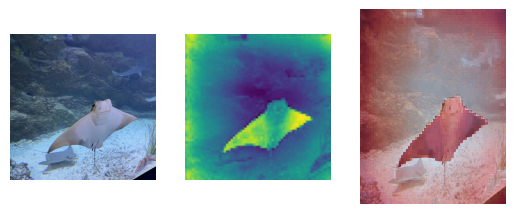

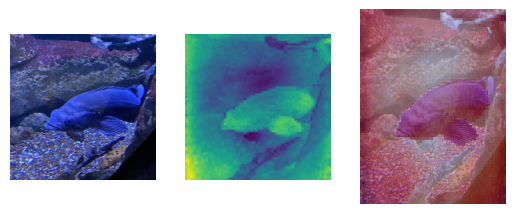

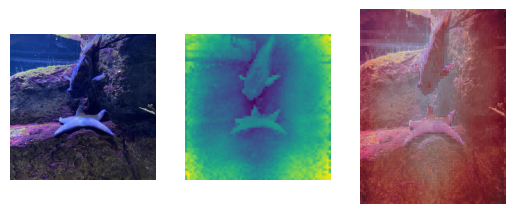

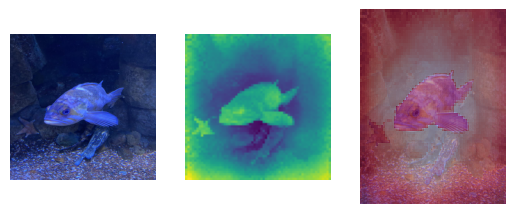

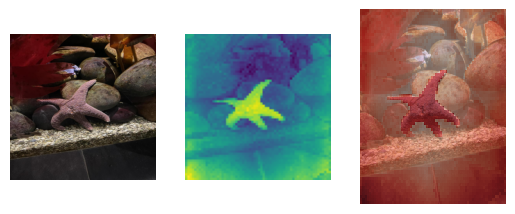

In [ ]:
for i, fish_path in enumerate(os.listdir('/content/fish/images')):
  if i < 5:

    current_fish = Image.open(f'/content/fish/images/{fish_path}').convert("RGB")
    encode_visualize(current_fish)
  else:
    continue

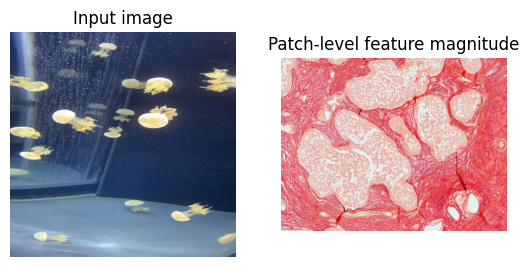

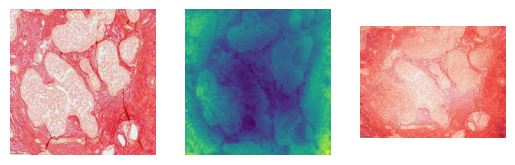

In [ ]:
I = Image.open('/content/bio.png').convert('RGB')
plt.figure(f)
plt.imshow(I)
plt.show()
encode_visualize(Image.open('/content/bio.png').convert('RGB'))

TODO:

encode - plot tokens, select pixel (x,y) - compute cosine similarity between all tokens - visualize like in dinov3 paper!!

$$
\cos{(\phi)}=\frac{\mathbf{A} \cdot \mathbf{B}}{\mathbf{||A \cdot B}||}
$$

Loading a random sample

In [ ]:
random_img = Image.open('/content/fish/images/' + os.listdir('/content/fish/images/')[random.randint(0, len(os.listdir('/content/fish/images/')))])
print(random_img is not None)

True


Extracting dino features

In [ ]:
x = preprocess(random_img).unsqueeze(0).to(device)
with torch.no_grad():
  features_dict = dinov3_vitb16.forward_features(x)
  patch_features = features_dict['x_norm_patchtokens']  # (1, num_patches, embed_dim)

squeeze and norm $\rightarrow$ patchmap

In [ ]:
print(patch_features)
print(patch_features.shape)

patch_norms = patch_features.norm(dim=-1).squeeze()  # vector n_patches
grid_size = int(patch_norms.shape[0] ** 0.5)
patch_map = patch_norms.reshape(grid_size, grid_size).cpu().numpy()

print(patch_map)
print(patch_map.shape)

tensor([[[ 0.1874, -0.0857, -0.4311,  ...,  0.4740, -0.1238, -0.2951],
         [ 0.2183, -0.0360, -0.3804,  ...,  0.4678, -0.1777, -0.2917],
         [ 0.2589,  0.0595, -0.4177,  ...,  0.4395, -0.1564, -0.1553],
         ...,
         [ 0.1272, -0.4902,  0.1285,  ...,  0.7354,  0.2300,  0.1306],
         [ 0.1120, -0.4751,  0.0881,  ...,  0.6746,  0.2226,  0.0800],
         [-0.0748, -0.5360, -0.0793,  ...,  0.5899, -0.0284, -0.0364]]],
       device='cuda:0')
torch.Size([1, 4096, 768])
[[12.242075  12.478563  12.598023  ... 12.652971  12.703614  12.353302 ]
 [12.275109  12.836393  12.745907  ... 12.855757  12.632259  12.77844  ]
 [12.698837  12.630212  12.717699  ... 12.753025  12.548158  12.651336 ]
 ...
 [12.3552475 12.300619  12.152481  ... 12.013058  12.138782  11.799232 ]
 [12.336544  12.390865  12.339566  ... 12.057004  12.156298  11.882922 ]
 [12.226404  12.4750595 12.311162  ... 12.210249  12.284408  11.878254 ]]
(64, 64)


tensor([[ 0.1874, -0.0857, -0.4311,  ...,  0.4740, -0.1238, -0.2951],
        [ 0.2183, -0.0360, -0.3804,  ...,  0.4678, -0.1777, -0.2917],
        [ 0.2589,  0.0595, -0.4177,  ...,  0.4395, -0.1564, -0.1553],
        ...,
        [ 0.1272, -0.4902,  0.1285,  ...,  0.7354,  0.2300,  0.1306],
        [ 0.1120, -0.4751,  0.0881,  ...,  0.6746,  0.2226,  0.0800],
        [-0.0748, -0.5360, -0.0793,  ...,  0.5899, -0.0284, -0.0364]],
       device='cuda:0')
torch.Size([4096, 768])
tensor(149.6066, device='cuda:0')
cosine sim (tensor([ 1.8742e-01, -8.5705e-02, -4.3111e-01,  2.9810e-01,  9.4943e-02,
        -4.6210e-01, -6.6836e-01, -7.5908e-01, -5.9316e-01, -1.7627e-02,
        -1.7710e-01, -3.1857e-01, -6.6546e-01, -2.8106e-01,  1.6102e-01,
        -1.3547e-01,  1.3396e-01, -3.3987e-01, -3.9760e-01,  7.2701e-01,
         3.8256e-03,  4.4073e-01, -2.1915e-03, -3.1662e-01,  4.2086e-01,
        -8.3285e-02, -3.0896e-01, -3.8827e-02, -3.3422e-02, -3.1680e-01,
        -4.3199e-01, -4.9508e-01, 

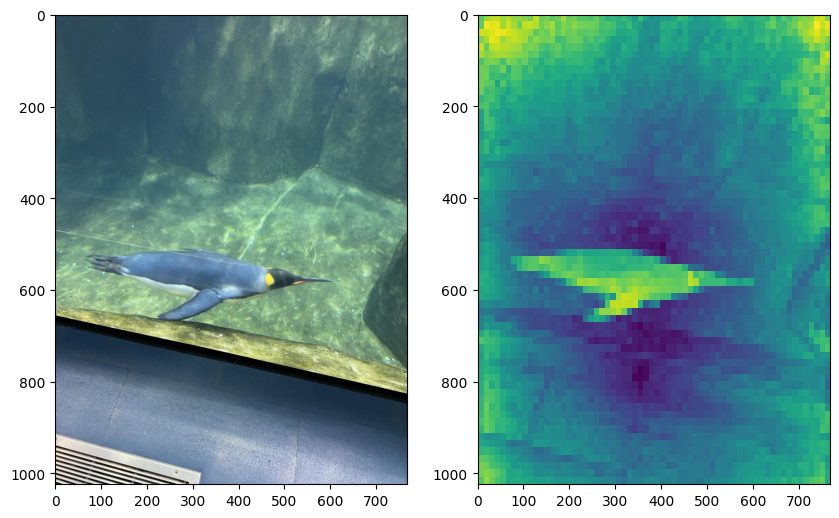

In [ ]:
patch_features_sq = patch_features.squeeze()
print(patch_features_sq)
print(patch_features_sq.shape)
#print(patch_features[0][2,:])
print(torch.dot(patch_features[0][0,:], patch_features[0][1,:]))

def cosine_sim(A, B, eps=1e-8):
    return torch.dot(A, B) / (A.norm() * B.norm() + eps)

print(f'cosine sim ({patch_features[0][0,:]}, {patch_features[0][i,:]}) = {(cosine_sim(patch_features[0][0,:], patch_features[0][i,:]))}')


f, a = plt.subplots(1, 2, figsize=(10,10))
a[0].imshow(random_img)
a[1].imshow(
    patch_map,
    extent=(0, random_img.size[0], random_img.size[1], 0),
    interpolation="nearest",
)

point = (500, 700)

tensor([0.3562, 0.3536, 0.3351,  ..., 0.3828, 0.3796, 0.3386])
(64, 64)


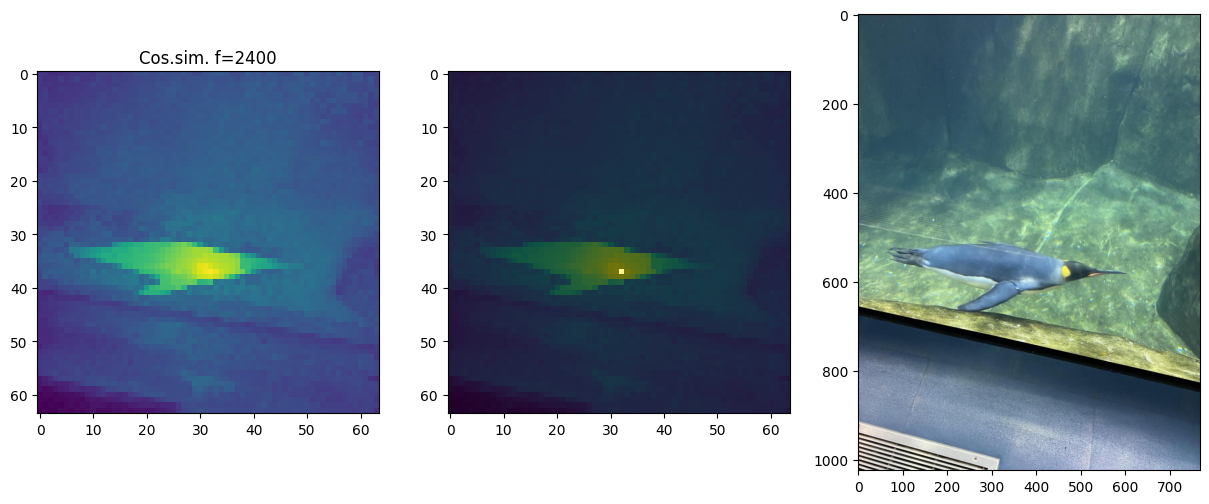

In [ ]:
feature_n = 2400

similarities = []
for i in range (patch_norms.shape[0]):
  #print(cosine_sim(patch_features[0][0,:], patch_features[0][i,:]))
  similarities.append(cosine_sim(patch_features[0][feature_n,:], patch_features[0][i,:]))

patch_similiarities = torch.tensor(similarities)
print(patch_similiarities)

grid_size = int(patch_similiarities.shape[0] ** 0.5)
patch_map = patch_similiarities.reshape(grid_size, grid_size).cpu().numpy()
print(patch_map.shape)

similarities = torch.stack(similarities)
mask = torch.zeros_like(similarities)
mask[feature_n] = 1
patch_mask = mask.reshape(grid_size, grid_size).cpu().numpy()


f,a = plt.subplots(1, 3)
f.set_figheight(15)
f.set_figwidth(15)
a = a.ravel()
a[0].imshow(patch_map, cmap='viridis')
a[0].set_title(f'Cos.sim. f={feature_n}')
a[1].imshow(patch_map, cmap='viridis')
a[1].imshow(patch_mask, cmap='gray', alpha=0.5)
a[2].imshow(random_img)

In [ ]:
REPO_DIR = "/content/dinov3"
meta_link = "secret"
dinov3_vitb16 = torch.hub.load(REPO_DIR, 'dinov3_vitb16', source='local', weights=meta_link)

dinov3_vitb16
dinov3_vitb16.eval()
dinov3_vitb16.to(device)

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (rope_embed): RopePositionEmbedding()
  (blocks): ModuleList(
    (0-11): 12 x SelfAttentionBlock(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv): LinearKMaskedBias(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
    )
  )
  (norm): LayerN

In [ ]:
def make_transform(resize_size: int = 512):
    to_tensor = transforms.v2.ToImage()
    resize = transforms.v2.Resize((resize_size, resize_size), antialias=True)
    to_float = transforms.v2.ToDtype(torch.float32, scale=True)
    normalize = transforms.v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return transforms.v2.Compose([to_tensor, resize, to_float, normalize])

def make_vis_transform(resize_size=512):
    return transforms.v2.Compose([
        transforms.v2.ToImage(),
        transforms.v2.Resize((resize_size, resize_size), antialias=True),
        transforms.v2.ToDtype(torch.float32, scale=True),
    ])

def cosine_sim(A, B, eps=1e-8):
    return torch.dot(A, B) / (A.norm() * B.norm() + eps)

def make_similarity_map(img, preprocessed, feature_n):
    x = preprocessed.unsqueeze(0).to(device)

    with torch.no_grad():
        feats = dinov3_vitb16.forward_features(x)
        patch_features = feats['x_norm_patchtokens'][0]

    N = patch_features.shape[0]
    grid_size = int(N ** 0.5)
    assert grid_size * grid_size == N
    assert 0 <= feature_n < N

    # Normalize
    tokens = torch.nn.functional.normalize(patch_features, dim=1)

    # Cosine similarity
    query = tokens[feature_n]
    similarities = tokens @ query

    sim_map = similarities.reshape(grid_size, grid_size).cpu().numpy()

    # visualize where our feature is in patch space
    mask = torch.zeros(N, device=tokens.device)
    mask[feature_n] = 1
    mask = mask.reshape(grid_size, grid_size).cpu().numpy()

    # align with patches
    vis_img = make_vis_transform()(img)
    vis_img = torch.nn.functional.interpolate(
    vis_img.unsqueeze(0),                  # (1, 1, H, W)
    size=(grid_size, grid_size),
    mode='nearest'
    ).squeeze().cpu().numpy()


    f, a = plt.subplots(1, 3, figsize=(15, 15))

    a[0].imshow(sim_map, cmap='viridis')
    a[0].set_title(f'Cos simil. (feat. index={feature_n})')

    a[1].imshow(sim_map, cmap='viridis')
    a[1].set_title(f'Feature location')
    a[1].imshow(mask, cmap='gray', alpha=0.5)

    a[2].imshow(np.transpose(vis_img,(1, 2, 0)))
    a[2].set_title(f'Original/aligned')
    plt.show()
    return sim_map

def make_transform(resize_size: int = 512):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return transforms.v2.Compose([to_tensor, resize, to_float, normalize])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using: {device}')

random_image = Image.open('/content/fish/images/' + os.listdir('/content/fish/images/')[random.randint(0, len(os.listdir('/content/fish/images/')))])
preprocess = make_transform(2048).to(device)
random_image_preprocessed = preprocess(random_image).to(device)

Using: cuda


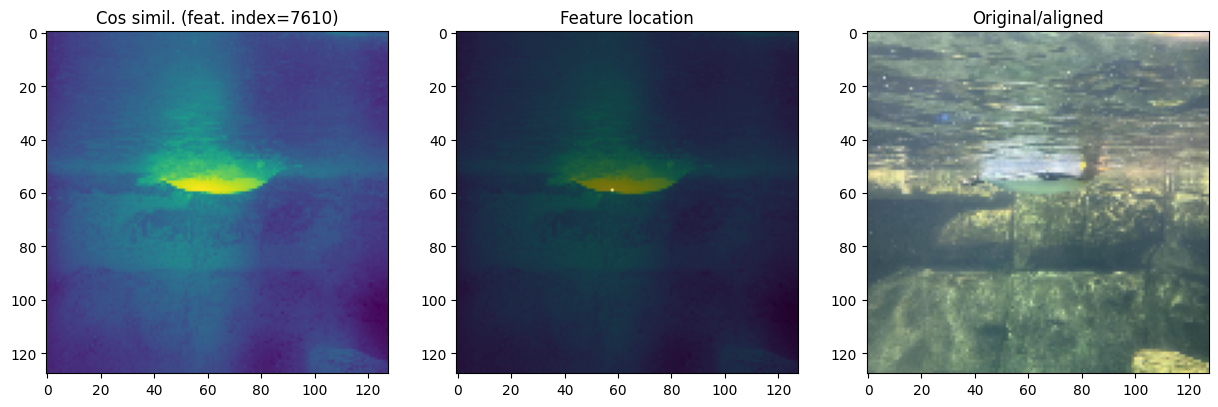

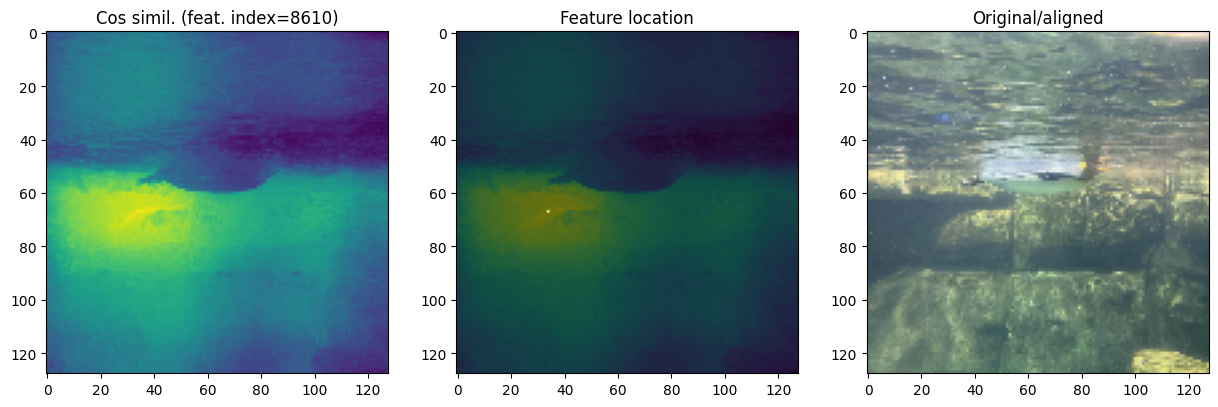

array([[0.53607076, 0.5515497 , 0.552211  , ..., 0.41607592, 0.40977314,
        0.414048  ],
       [0.5407367 , 0.5514184 , 0.5553651 , ..., 0.4415961 , 0.44795248,
        0.43697372],
       [0.535362  , 0.5458731 , 0.55983555, ..., 0.4550926 , 0.45438528,
        0.4436617 ],
       ...,
       [0.5331453 , 0.5335621 , 0.5291006 , ..., 0.4671589 , 0.490665  ,
        0.48054573],
       [0.5537444 , 0.56125957, 0.55236673, ..., 0.47629535, 0.46859252,
        0.44853887],
       [0.53171664, 0.5592153 , 0.578573  , ..., 0.43378255, 0.4365707 ,
        0.47842523]], dtype=float32)

In [ ]:
make_similarity_map(random_image, random_image_preprocessed, 7610)
make_similarity_map(random_image, random_image_preprocessed, 8610)

# Depth prediction: DINOV3

Pretrained heads - Depther trained on SYNTHMIX dataset

https://github.com/facebookresearch/dinov3?tab=readme-ov-file

In [ ]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision import transforms
import torch.nn.functional as F
import random
from torchvision.transforms import v2

In [ ]:
!git clone https://github.com/facebookresearch/dinov3.git
%cd dinov3
!pip install -r requirements.txt

Cloning into 'dinov3'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 538 (delta 199), reused 99 (delta 99), pack-reused 176 (from 1)
Receiving objects: 100% (538/538), 9.88 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/dinov3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 43.6 MB/s eta 0:00:00


In [ ]:
!ls -lh

total 1.2G
-rw-r--r--  1 root root 3.5K Dec 16 10:51 CODE_OF_CONDUCT.md
-rw-r--r--  1 root root  369 Dec 16 10:51 conda.yaml
-rw-r--r--  1 root root 1.3K Dec 16 10:51 CONTRIBUTING.md
-rw-r--r--  1 root root 2.0K Dec 16 10:51 DATASETS.md
drwxr-xr-x 18 root root 4.0K Dec 16 10:51 dinov3
-rw-r--r--  1 root root 881M Aug 12 16:36 dinov3_vit7b16_synthmix_dpt_head-02040be1.pth
-rw-r--r--  1 root root 327M Aug 12 16:01 dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth
-rw-r--r--  1 root root  763 Dec 16 10:51 hubconf.py
-rw-r--r--  1 root root 7.4K Dec 16 10:51 LICENSE.md
-rw-r--r--  1 root root  13K Dec 16 10:51 MODEL_CARD.md
drwxr-xr-x  2 root root 4.0K Dec 16 10:51 notebooks
-rw-r--r--  1 root root  729 Dec 16 10:51 pyproject.toml
-rw-r--r--  1 root root  31K Dec 16 10:51 README.md
-rw-r--r--  1 root root   70 Dec 16 10:51 requirements-dev.txt
-rw-r--r--  1 root root   84 Dec 16 10:51 requirements.txt
-rw-r--r--  1 root root 2.5K Dec 16 10:51 setup.py


In [5]:
REPO_DIR = "/content/dinov3"
WEIGHTS = "/content/dinov3/dinov3_vit7b16_synthmix_dpt_head-02040be1.pth"
BB_WEIGHTS = "/content/dinov3/dinov3_vit7b16_pretrain_lvd1689m-a955f4ea"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using: {device}')
#_--------------
depther = torch.hub.load(REPO_DIR, 'dinov3_vit7b16_dd', source="local", weights=WEIGHTS, backbone_weights=BB_WEIGHTS)

display(depther)
depther.eval()
depther.to(device)

Using: cuda
Downloading: "file:///content/dinov3/dinov3_vit7b16_pretrain_lvd1689m-a955f4ea" to /root/.cache/torch/hub/checkpoints/dinov3_vit7b16_pretrain_lvd1689m-a955f4ea


100%|██████████| 25.0G/25.0G [01:25<00:00, 314MB/s] 


Downloading: "file:///content/dinov3/dinov3_vit7b16_synthmix_dpt_head-02040be1.pth" to /root/.cache/torch/hub/checkpoints/dinov3_vit7b16_synthmix_dpt_head-02040be1.pth


100%|██████████| 880M/880M [00:04<00:00, 211MB/s]


Depther(
  (encoder): DinoVisionTransformerWrapper(
    (backbone): DinoVisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 4096, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (rope_embed): RopePositionEmbedding()
      (blocks): ModuleList(
        (0-39): 40 x SelfAttentionBlock(
          (norm1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
          (attn): SelfAttention(
            (qkv): LinearKMaskedBias(in_features=4096, out_features=12288, bias=False)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=4096, out_features=4096, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (norm2): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
          (mlp): SwiGLUFFN(
            (w1): Linear(in_features=4096, out_features=8192, bias=True)
            (w2): Linear(in_features=4096, out_features=8192,

Depther(
  (encoder): DinoVisionTransformerWrapper(
    (backbone): DinoVisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 4096, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (rope_embed): RopePositionEmbedding()
      (blocks): ModuleList(
        (0-39): 40 x SelfAttentionBlock(
          (norm1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
          (attn): SelfAttention(
            (qkv): LinearKMaskedBias(in_features=4096, out_features=12288, bias=False)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=4096, out_features=4096, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (norm2): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
          (mlp): SwiGLUFFN(
            (w1): Linear(in_features=4096, out_features=8192, bias=True)
            (w2): Linear(in_features=4096, out_features=8192,

In [ ]:
!unzip -q '/content/fish' -d '/content/fish'

In [6]:
!rm /content/dinov3/dinov3_vit7b16_pretrain_lvd1689m-a955f4ea

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

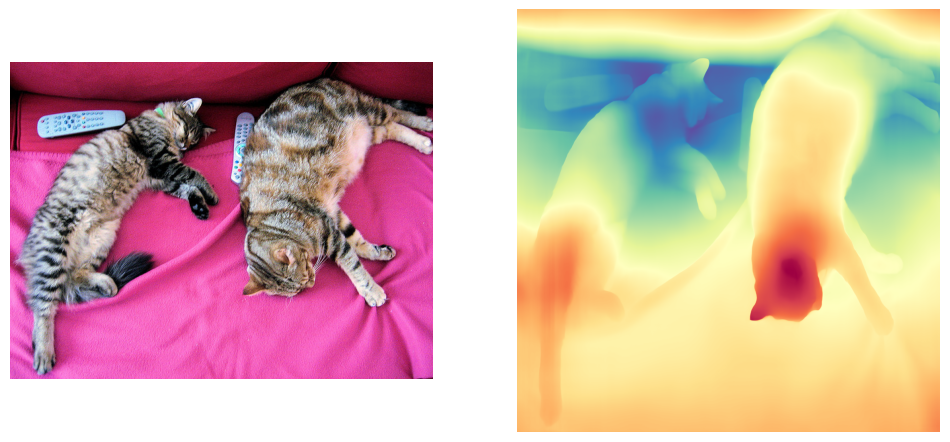

In [10]:
from PIL import Image
import torch
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from matplotlib import colormaps

def get_img(fish):
  if fish == False:
      import requests
      url = "http://images.cocodataset.org/val2017/000000039769.jpg"
      image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
  else:
      image = Image.open("content/fish/images/IMG_2334_jpeg_jpg.rf.b545bdad952bf47fbadb8ee504e52c36.jpg").convert("RGB")
  return image

def make_transform(resize_size: int | list[int] = 768):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return v2.Compose([to_tensor, resize, to_float, normalize])

img_size = 1024
img = get_img(fish=False)
transform = make_transform(img_size)

with torch.inference_mode():
    with torch.autocast('cuda', dtype=torch.bfloat16):
        batch_img = transform(img)[None].to(device)
        batch_img = batch_img.to(device)
        batch_img = batch_img
        depths = depther(batch_img)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(depths[0,0].cpu(), cmap=colormaps["Spectral"])
plt.axis("off")


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

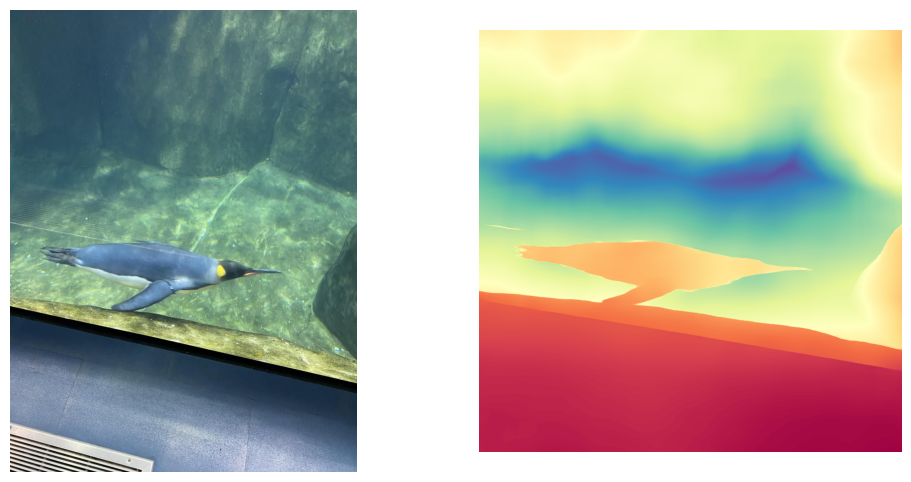

In [12]:
from PIL import Image
import torch
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from matplotlib import colormaps

def get_img(fish):
  if fish == False:
      import requests
      url = "http://images.cocodataset.org/val2017/000000039769.jpg"
      image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
  else:
      image = Image.open("/content/fish/images/IMG_2334_jpeg_jpg.rf.b545bdad952bf47fbadb8ee504e52c36.jpg").convert("RGB")
  return image

def make_transform(resize_size: int | list[int] = 768):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return v2.Compose([to_tensor, resize, to_float, normalize])

img_size = 1024
img = get_img(fish=True)
transform = make_transform(img_size)

with torch.inference_mode():
    with torch.autocast('cuda', dtype=torch.bfloat16):
        batch_img = transform(img)[None].to(device)
        batch_img = batch_img.to(device)
        batch_img = batch_img
        depths = depther(batch_img)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(depths[0,0].cpu(), cmap=colormaps["Spectral"])
plt.axis("off")


IMG_8528_jpg.rf.2b4f4faa5412fc350cc967990c6249c5.jpg


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

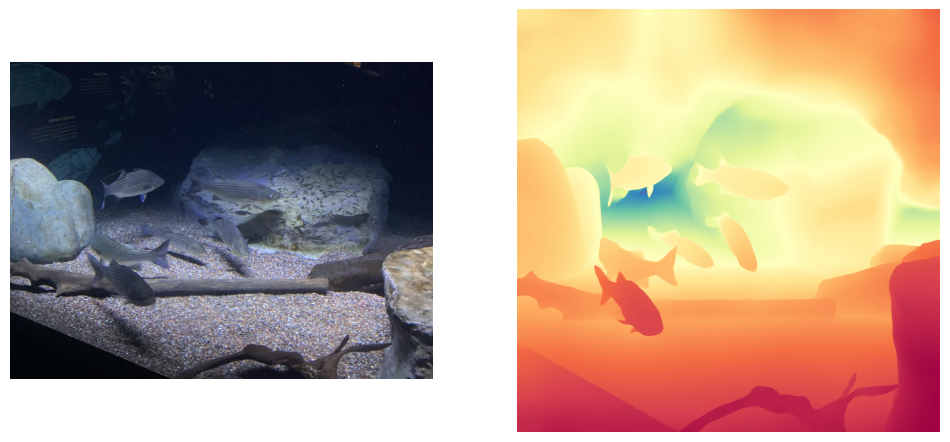

In [34]:
random_n = random.randint(0, len(os.listdir('/content/fish/images/')))

def get_img(fish):
  if fish == False:
      import requests
      url = "http://images.cocodataset.org/val2017/000000039769.jpg"
      image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
  else:
      random_n = random.randint(0, len(os.listdir('/content/fish/images/')))
      image = Image.open('/content/fish/images/' + os.listdir('/content/fish/images/')[random_n]).convert("RGB")
      print(os.listdir('/content/fish/images/')[random_n])
  return image

img_size = 1024
img = get_img(fish=True)
transform = make_transform(img_size)

with torch.inference_mode():
    with torch.autocast('cuda', dtype=torch.bfloat16):
        batch_img = transform(img)[None].to(device)
        batch_img = batch_img.to(device)
        batch_img = batch_img
        depths = depther(batch_img)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(depths[0,0].cpu(), cmap=colormaps["Spectral"])
plt.axis("off")

In [25]:
depths

tensor([[[[37.4838, 37.4817, 37.4832,  ..., 36.5179, 36.5214, 36.5052],
          [37.4920, 37.5058, 37.4947,  ..., 36.5147, 36.5249, 36.5267],
          [37.4899, 37.4971, 37.4868,  ..., 36.5132, 36.5235, 36.5219],
          ...,
          [35.9068, 35.9066, 35.9144,  ..., 35.8900, 35.8978, 35.8857],
          [35.8968, 35.8900, 35.8991,  ..., 35.8797, 35.8887, 35.8703],
          [35.8931, 35.9018, 35.9107,  ..., 35.8805, 35.8828, 35.8653]]]],
       device='cuda:0')

# Unet for baseline performance metrics

NYU Depth v2 dataset

In [ ]:
!wget 'http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat'

--2025-12-14 17:31:22--  http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
Resolving horatio.cs.nyu.edu (horatio.cs.nyu.edu)... 216.165.22.17
Connecting to horatio.cs.nyu.edu (horatio.cs.nyu.edu)|216.165.22.17|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat [following]
--2025-12-14 17:31:23--  https://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
Connecting to horatio.cs.nyu.edu (horatio.cs.nyu.edu)|216.165.22.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2972037809 (2.8G)
Saving to: ‘nyu_depth_v2_labeled.mat’

nyu_depth_v2_labele 100%[===================>]   2.77G  12.6MB/s    in 4m 13s  

2025-12-14 17:35:37 (11.2 MB/s) - ‘nyu_depth_v2_labeled.mat’ saved [2972037809/2972037809]



In [ ]:
class